In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
grocery = pd.read_csv('grocerydb.csv')
grocery.head()

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3.0,2.79,0.055973,90.7184,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0.0,2.49,0.019213,90.7184,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3.0,4.99,0.017781,396.8930,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051


<Axes: xlabel='FPro_class', ylabel='Sodium'>

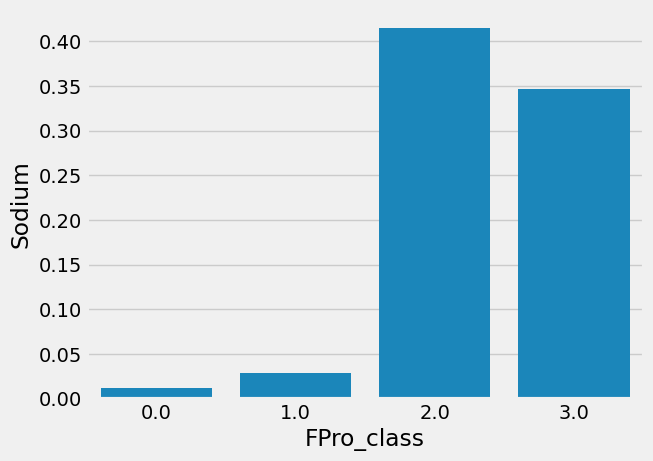

In [3]:
sns.barplot(grocery.groupby('FPro_class')['Sodium'].median())

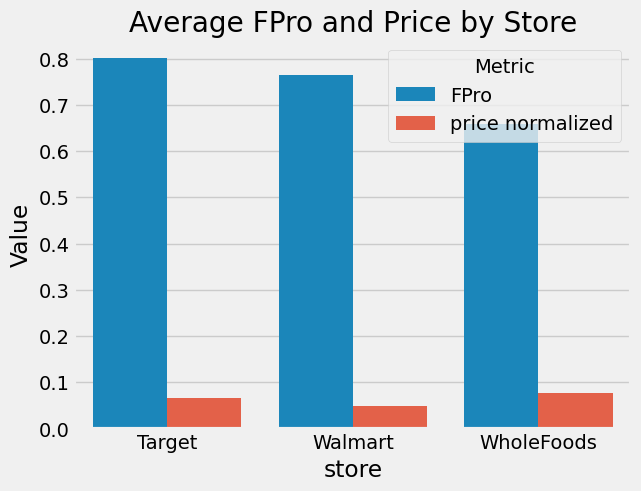

In [4]:
grocery['price normalized'] = (grocery['price'] - grocery['price'].min()) / (grocery['price'].max() - grocery['price'].min())

store_stats = grocery.groupby('store')[['FPro', 'price normalized']].mean().reset_index()

melted = store_stats.melt(id_vars='store', var_name='Metric', value_name='Value')

sns.barplot(data=melted, x='store', y='Value', hue='Metric')
plt.title('Average FPro and Price by Store')
plt.legend(title='Metric')
plt.show()

In [5]:
px.scatter(grocery, x=(grocery['FPro']), y=np.sqrt(grocery['price']))

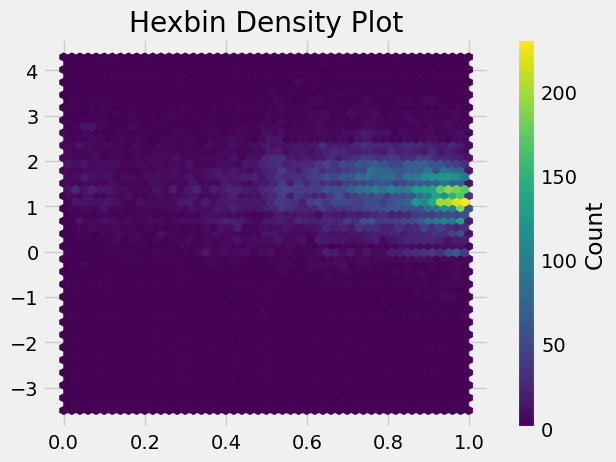

In [6]:
plt.hexbin(x=grocery['FPro'], y=np.log(grocery['price']), gridsize=50, cmap='viridis')
plt.colorbar(label='Count')
plt.title("Hexbin Density Plot")
plt.show()

# FPro by category

In [7]:
#erase all the wf whole foods items
grocery2 = grocery[~grocery['category'].str.contains('-wf')]
grocery2['category'].unique()

array(['baby-food', 'baking', 'bread', 'breakfast', 'cakes', 'cereal',
       'cheese', 'cookies-biscuit', 'culinary-ingredients',
       'dairy-yogurt-drink', 'dressings', 'drink-coffee', 'drink-juice',
       'drink-shakes-other', 'drink-soft-energy-mixes', 'drink-tea',
       'ice-cream-dessert', 'jerky', 'mac-cheese', 'meat-packaged',
       'milk-milk-substitute', 'muffins-bagels', 'pasta-noodles',
       'pastry-chocolate-candy', 'pizza', 'prepared-meals-dishes',
       'produce-packaged', 'pudding-jello', 'rice-grains-packaged',
       'rolls-buns-wraps', 'salad', 'sauce-all', 'sausage-bacon',
       'seafood', 'snacks-bars', 'snacks-chips', 'snacks-dips-salsa',
       'snacks-mixes-crackers', 'snacks-nuts-seeds', 'snacks-popcorn',
       'soup-stew', 'spices-seasoning', 'spread-squeeze'], dtype=object)

In [8]:
#clean the category names
cleaned = (grocery2['category'].str.replace('-',' ')
           .str.replace('drink juice', 'juice')
           .str.replace('drink soft energy mixes', 'soft drinks, energy drinks, and mixes')
           .str.replace('pasta noodles', 'pasta and noodles')
           .str.replace('cookies biscuit', 'cookies and biscuits')
           .str.replace('dairy-yogurt-drink', 'dairy and yogurt drinks')
           .str.replace('drink coffee', 'coffee')
           .str.replace('drink tea', 'tea')
           .str.replace('rice grains packaged', 'packaged rice and grains')
           .str.replace('drink shakes other', 'shakes and other drinks')
           .str.replace('mac-cheese', 'mac and cheese')
           .str.replace('mac-cheese', 'mac and cheese')
           .str.replace('milk milk substitute', 'milk and milk substitutes')
           .str.replace('muffins bagels', 'muffins and bagels')
           .str.replace('meat packaged', 'packaged meat')
           .str.replace('pastry chocolate candy', 'pastries, chocolates, and candies')
           .str.replace('prepared meals dishes', 'prepared meals and dishes')
           .str.replace('produce packaged', 'packaged produce')
           .str.replace('pudding jello', 'pudding and jello')
           .str.replace('rolls bun wraps', 'rolls, buns, and wraps')
           .str.replace('sauce all', 'sauces')
           .str.replace('sausage bacon', 'sausages and bacon')
           .str.replace('snacks bars', 'snack bars')
           .str.replace('snacks chips', 'chips')
           .str.replace('snacks dip salsa', 'dips and salsa')
           .str.replace('snacks mixes crackers', 'mixes and crackers')
           .str.replace('snacks nuts seeds', 'nuts and seeds')
            .str.replace('snacks popcorn', 'popcorn')
            .str.replace('soup stew', 'soups and stews')
              .str.replace('spices seasoning', 'spices and seasonings')
              .str.replace('spread squeeze', 'spreads and squeezes')
)
grocery2['category'] = cleaned 
cleaned

C:\Users\danie\AppData\Local\Temp\ipykernel_8228\595765893.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                   baby food
1                   baby food
2                   baby food
3                   baby food
4                   baby food
                 ...         
26245    spreads and squeezes
26246    spreads and squeezes
26247    spreads and squeezes
26248    spreads and squeezes
26249    spreads and squeezes
Name: category, Length: 24142, dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_8228\1691890809.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




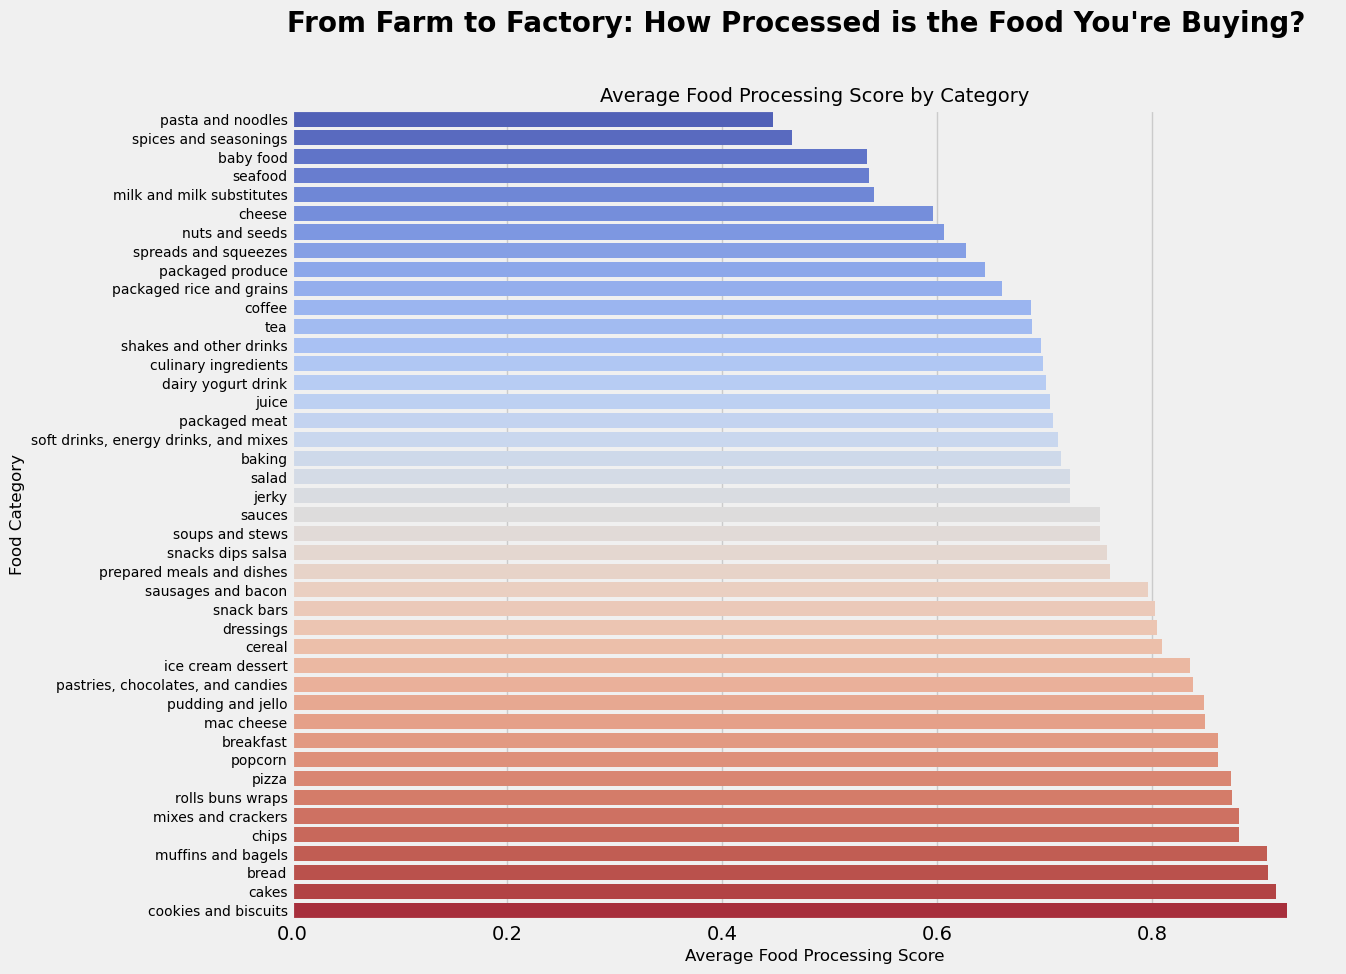

In [9]:
plt.figure(figsize=(12, 10))

sns.barplot(
    grocery2.groupby('category')['FPro']
    .mean()
    .sort_values(),
    orient='h',
    palette="coolwarm" 
)

# Adjust text and labels
plt.suptitle("From Farm to Factory: How Processed is the Food You're Buying?", fontsize=20, fontweight='bold')
plt.title("Average Food Processing Score by Category", fontsize=14)
plt.xlabel("Average Food Processing Score", fontsize=12)
plt.ylabel("Food Category", fontsize=12)
plt.yticks(fontsize=10) 

plt.show()

In [10]:
# Compute median FPro for sorting
category_order = grocery2.groupby("category")["FPro"].median().sort_values().index

In [11]:
# TODO: IDEA MAKE IT TOP 5 MOST AND TOP 5 LEAST PROCESSED4
# BAKED GOODS ARE AMONG THE MOST PROCESSED

C:\Users\danie\AppData\Local\Temp\ipykernel_8228\3543089066.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




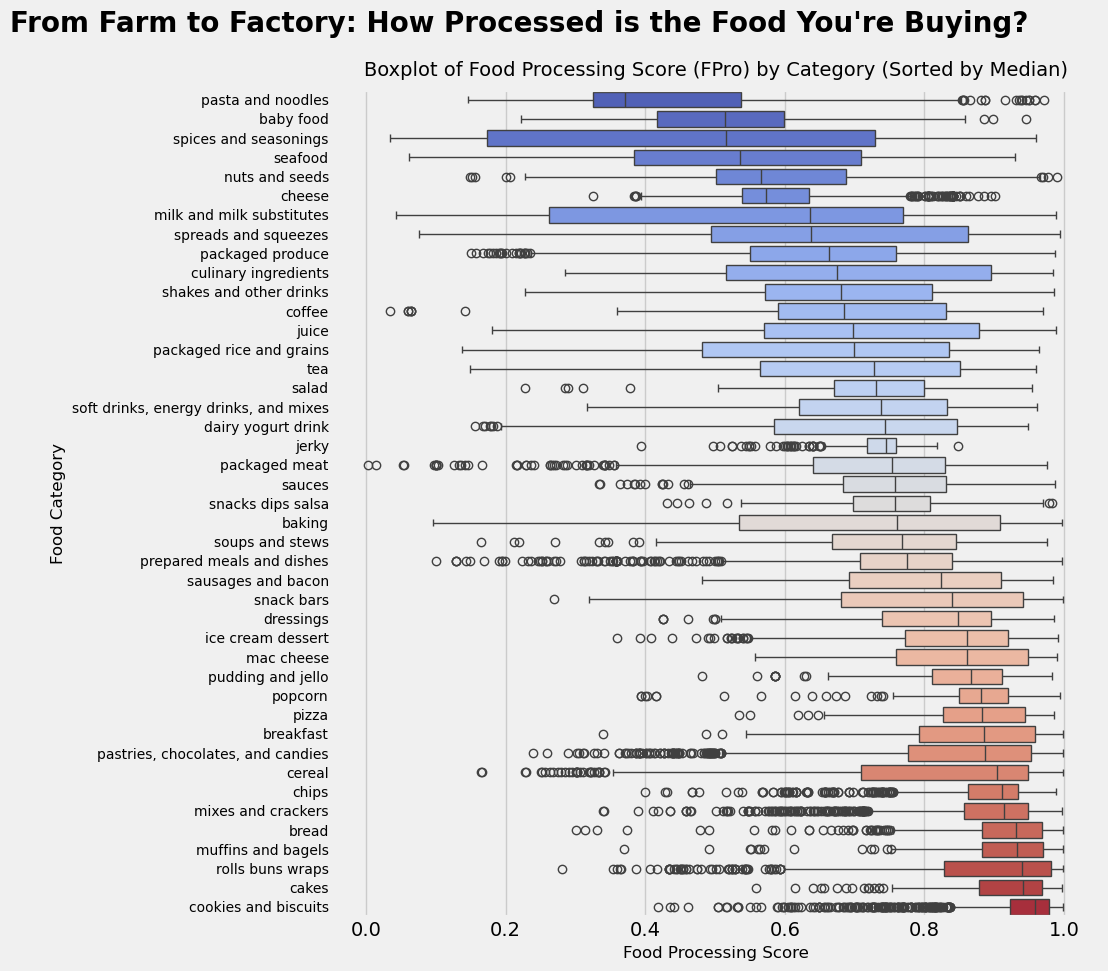

In [12]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=grocery2, x="FPro", y="category", order=category_order, palette="coolwarm")

# Improve readability
plt.suptitle("From Farm to Factory: How Processed is the Food You're Buying?", fontsize=20, fontweight='bold')
plt.title("Boxplot of Food Processing Score (FPro) by Category (Sorted by Median)", fontsize=14, pad=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.xlabel("Food Processing Score", fontsize=12)
plt.ylabel("Food Category", fontsize=12)
plt.yticks(fontsize=10)

plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_8228\2577418661.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\danie\AppData\Local\Temp\ipykernel_8228\2577418661.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




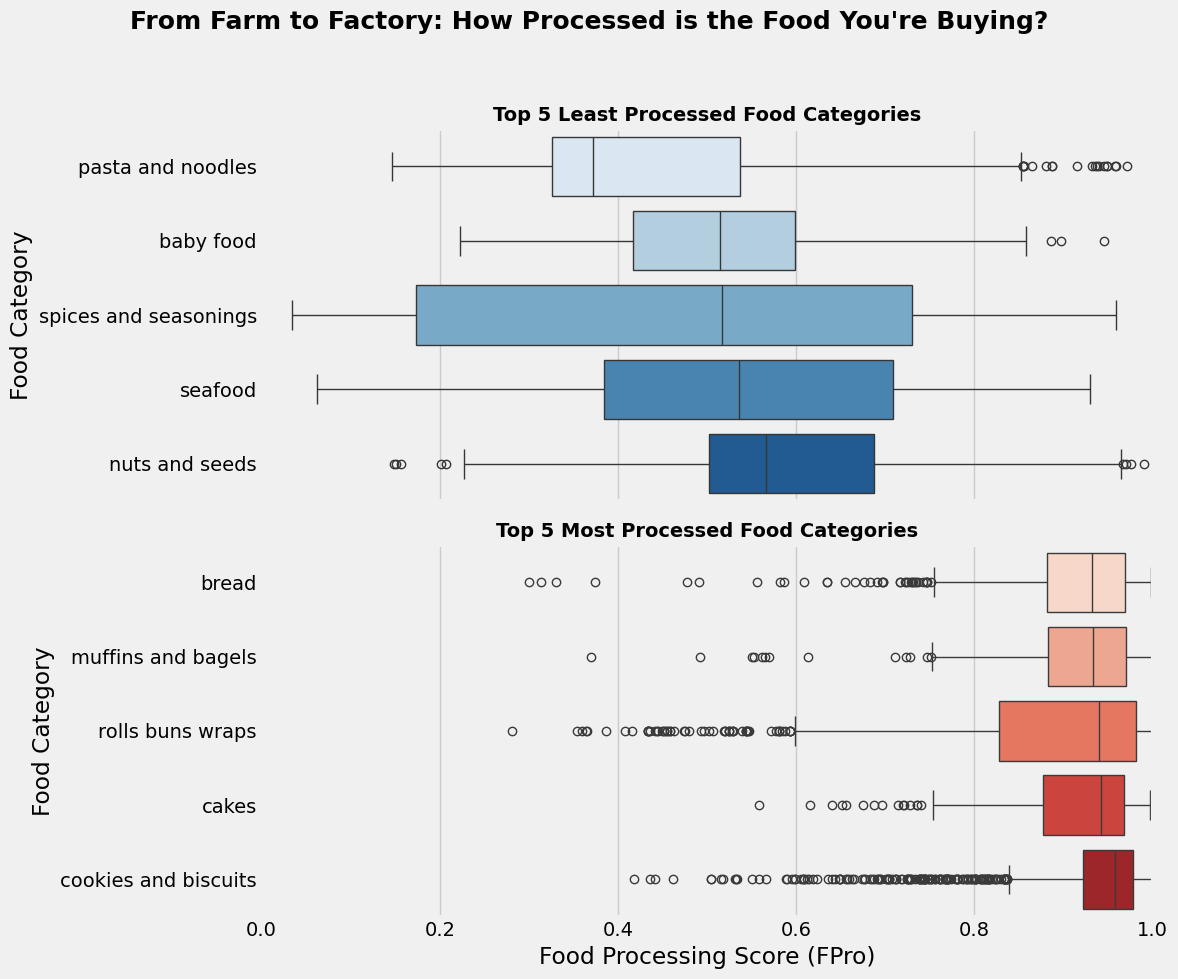

In [13]:
plt.style.use("fivethirtyeight")
least_processed = category_order[:5]
most_processed = category_order[-1:-6:-1]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
# Left: Least processed
sns.boxplot(data=grocery2[grocery2['category'].isin(least_processed)],
            x='FPro', y='category', order=least_processed,
            palette='Blues', ax=axes[0])
axes[0].set_title("Top 5 Least Processed Food Categories", fontsize=14, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Food Category")
axes[0].set_xlim(0, 1)

# Bottom: Most processed
sns.boxplot(data=grocery2[grocery2['category'].isin(most_processed)],
            x='FPro', y='category', order=most_processed[::-1],
            palette='Reds', ax=axes[1])
axes[1].set_title("Top 5 Most Processed Food Categories", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Food Processing Score (FPro)")
axes[1].set_ylabel("Food Category")

# Super title and layout
fig.suptitle("From Farm to Factory: How Processed is the Food You're Buying?",
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# An investigation of "Organic" grocery store items

In [14]:
grocery['is_organic'] = grocery['name'].str.lower().str.contains('organic')

In [15]:
grocery.head()

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol,price normalized,is_organic
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101,0.072094,True
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3.0,5.29,0.043984,396.8930,5.050505,3.030303,12.121212,9.090909,0.000000,0.080808,0.010101,0.072094,True
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3.0,2.79,0.055973,90.7184,1.098901,0.549451,13.186813,7.692308,2.197802,0.010989,0.000000,0.037829,True
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0.0,2.49,0.019213,90.7184,5.494505,7.692308,15.384615,8.791209,3.296703,0.000000,0.000000,0.033717,True
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3.0,4.99,0.017781,396.8930,3.030303,1.010101,14.141414,6.060606,2.020202,0.050505,0.005051,0.067982,True


<Axes: xlabel='FPro', ylabel='Density'>

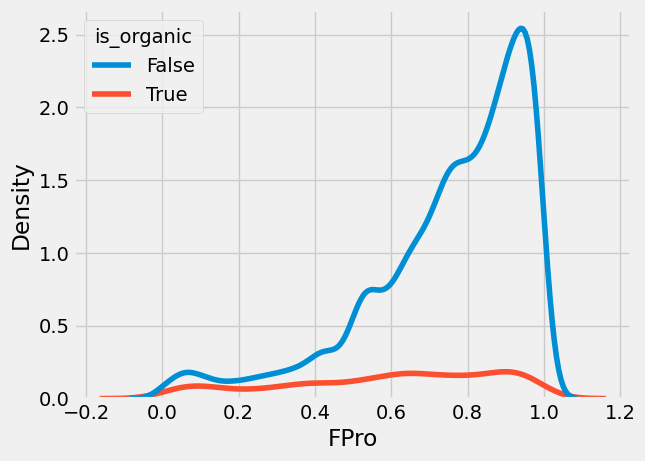

In [16]:
sns.kdeplot(data=grocery, x='FPro', hue='is_organic')

<Axes: xlabel='FPro', ylabel='Density'>

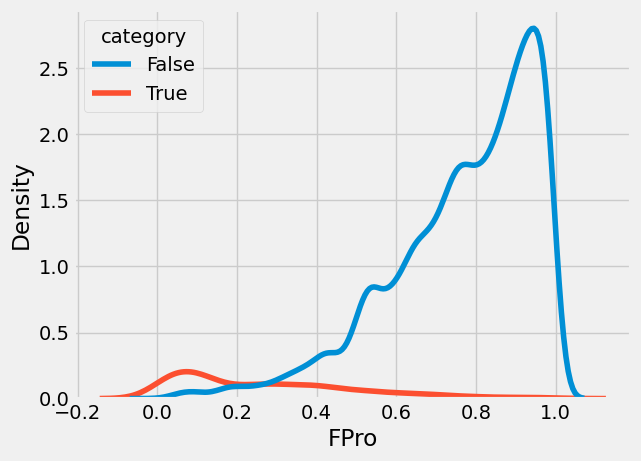

In [17]:
sns.kdeplot(data=grocery, x='FPro', hue=grocery['category'].str.contains("-wf"))